# Lab1 数字图像空域增强实验

**Author: Gao Pengbing (nbgao)**  
**Email: nbgao@126.com**

## Work3 图像锐化
### Work3-P1
自己编写程序，实现Lapalician算子，Sobel算子，提取图像的细节信息

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import cv2
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Sobel

In [9]:
''' Sobel
Horizonal (X)
Gy =
-1 -2 -1
 0  0  0
 1  2  1

Vertical (Y)
Gx = 
-1 0 1
-2 0 2
-1 0 1
'''
def SobelFilter(I, orientation):
    [h, w] = I.shape[:2]
    G = np.zeros((h, w))
    # Filter
    K = np.ones((3,3))
    
    if(orientation in ['h', 'H', 'y', 'Y']):     # Horizon Edge Detect
        K = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    elif(orientation in ['v', 'V', 'x', 'X']):   # Verticle Edge Detect
        K = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    for i in range(1,h-1):
        for j in range(1,w-1):
            T = I[i-1:i+2, j-1:j+2]
#             G[i,j] = np.sum(T*K)
            G[i,j] = np.abs(np.sum(T*K))
#             G[i,j] = 255 if G[i,j]>255 else G[i,j]
#     G[G>255] = 255
#     G = np.uint8(G)
#     取绝对值，大于255的置为255
#     G = cv2.convertScaleAbs(G)
    G = np.uint8(G)
    return G

### Laplacian

In [10]:
''' Laplacian
small
K = 
 0 -1  0
-1  4 -1
 0 -1  0

large
K = 
-1 -1 -1
-1  8 -1
-1 -1 -1 
'''
def LaplacianFilter(I, mode):
    [h, w] = I.shape[:2]
    G = np.zeros((h, w))
    # Filter
    K = np.ones((3,3))
    
    if(mode in ['4', 's', 4]):
        K = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    elif(mode in ['8', 'l', 8]):
        K = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])    

    for i in range(1,h-1):
        for j in range(1,w-1):
            T = I[i-1:i+2, j-1:j+2]
            G[i,j] = np.abs(np.sum(T * K))
    
#     G = cv2.convertScaleAbs(G)
    G = np.uint8(G)
    return G

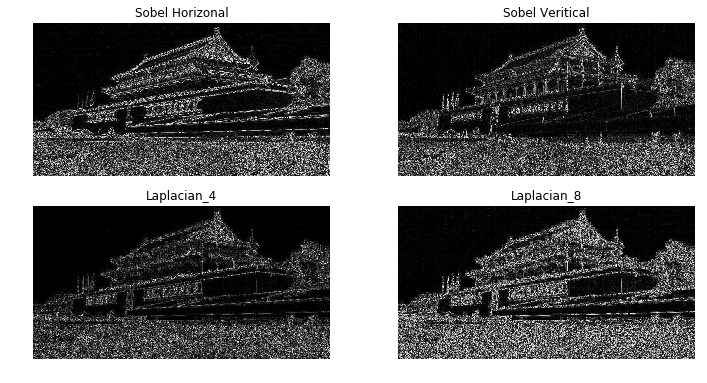

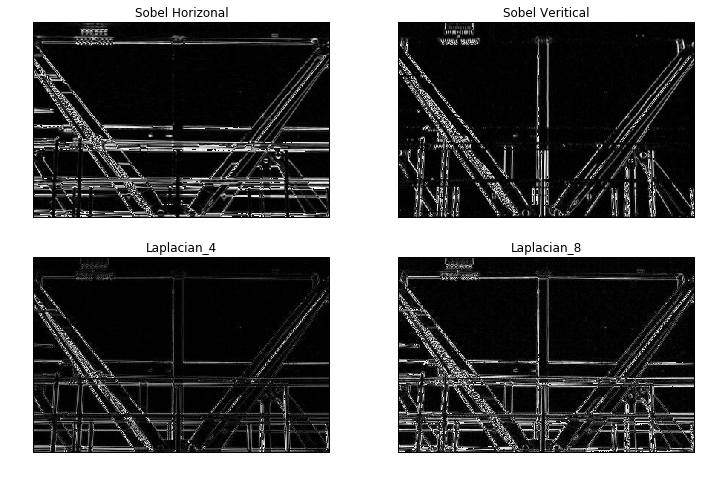

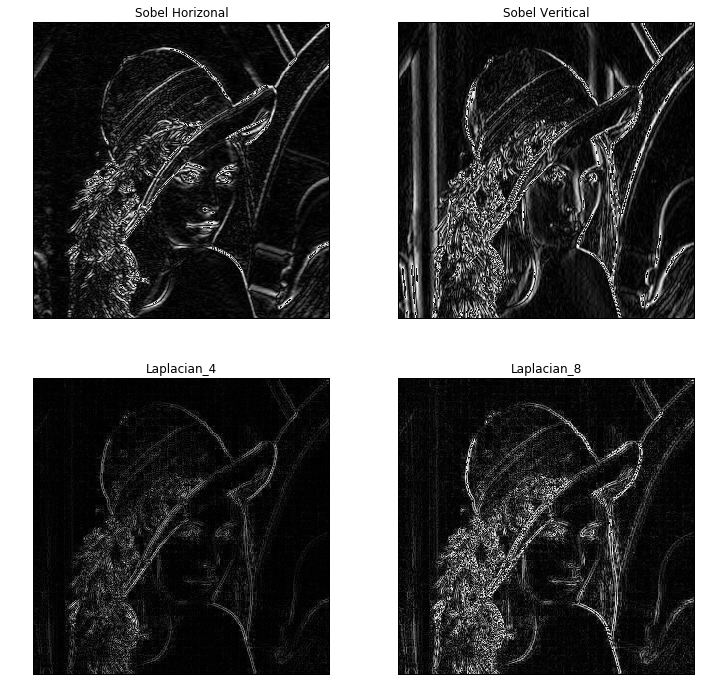

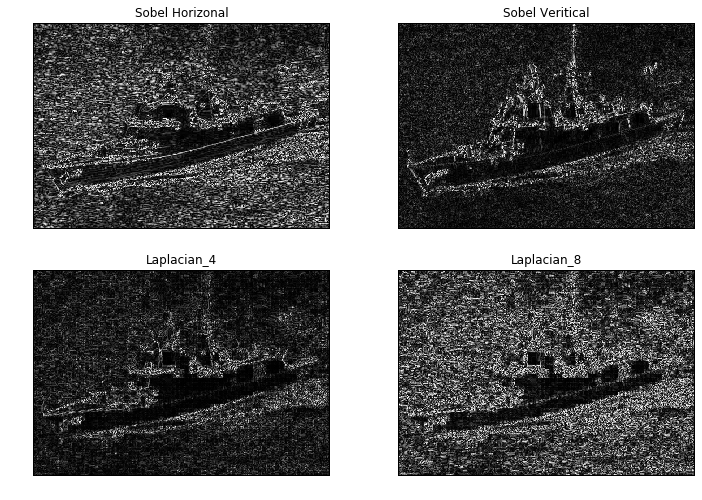

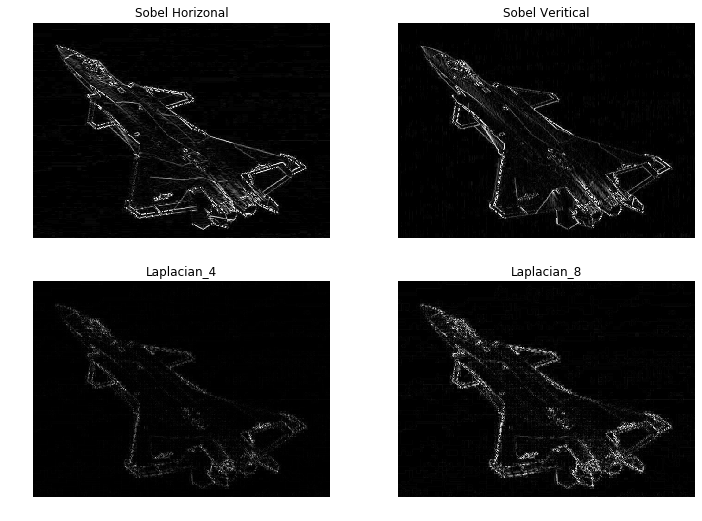

In [11]:
for i in range(1,6):
    file_path = '../Image/image'+str(i)+'.jpg'
    img = plt.imread(file_path)
    img_gray = np.uint8(skimage.color.rgb2gray(img)*255)
    
    sobel_h = SobelFilter(img_gray, 'h')
    sobel_v = SobelFilter(img_gray, 'v')

    laplacian_4 = LaplacianFilter(img_gray, 4)
    laplacian_8 = LaplacianFilter(img_gray, 8)
    
    plt.figure(figsize=(12,12*img.shape[0]/img.shape[1]))
    plt.subplot(221)
    plt.imshow(sobel_h, cmap='gray')
    plt.title('Sobel Horizonal')
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(sobel_v, cmap='gray')
    plt.title('Sobel Veritical')
    plt.axis('off')
    
    plt.subplot(223)
    plt.imshow(laplacian_4, cmap='gray')
    plt.title('Laplacian_4')
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(laplacian_8, cmap='gray')
    plt.title('Laplacian_8')
    plt.axis('off')

    plt.show()

### Work3-P2
自己设计一个模板，与传统的Lapalician算子和Sobel算子不同（检测x和y方向），能够检测斜方向上的图像细节

### Work3-P3
将上述步骤提取的图像细节，叠加到原图上，分析和比较锐化后的效果

In [14]:
''' Slanted
right
K = 
 0  1  1
-1  0  1
-1 -1  0

left
K = 
 1  1  0
 1  0 -1
 0 -1 -1
'''
def SlantedFilter(I, mode):
    [h, w] = I.shape[:2]
    G = np.zeros([h, w])
    # Filter
    K = np.ones([3,3])
    
    if(mode in ['r', 'R', 'left']):
        K = np.array([[0,1,1],[-1,0,1],[-1,-1,0]])
    elif(mode in ['l', 'L', 'right']):
        K = np.array([[1,1,0],[1,0,-1],[0,-1,-1]])    

    for i in range(1,h-1):
        for j in range(1,w-1):
            T = I[i-1:i+2, j-1:j+2]
            G[i,j] = np.abs(np.sum(T * K))
    
    G = np.uint8(G)
    return G

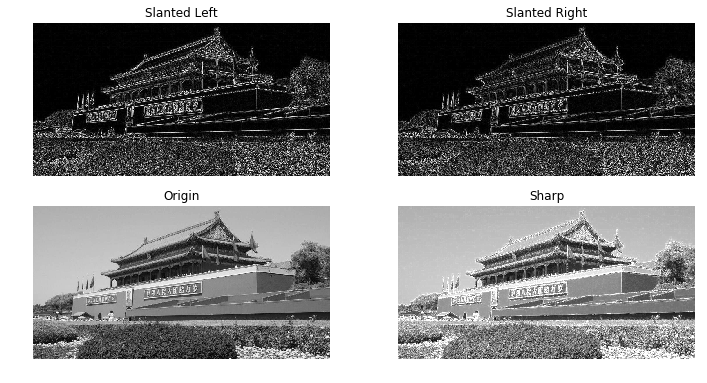

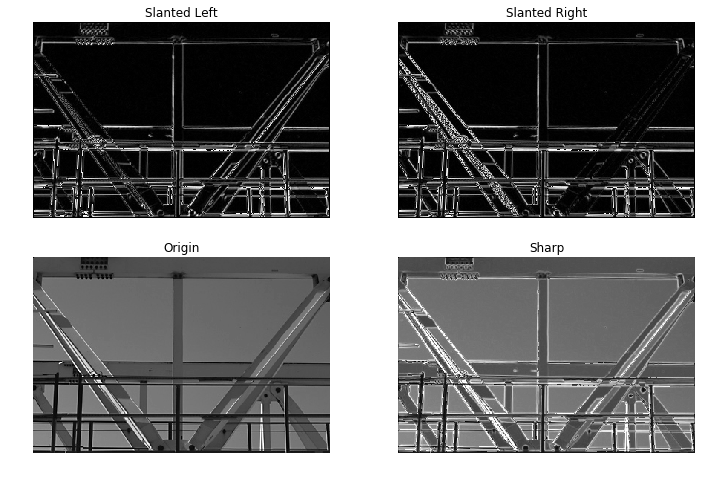

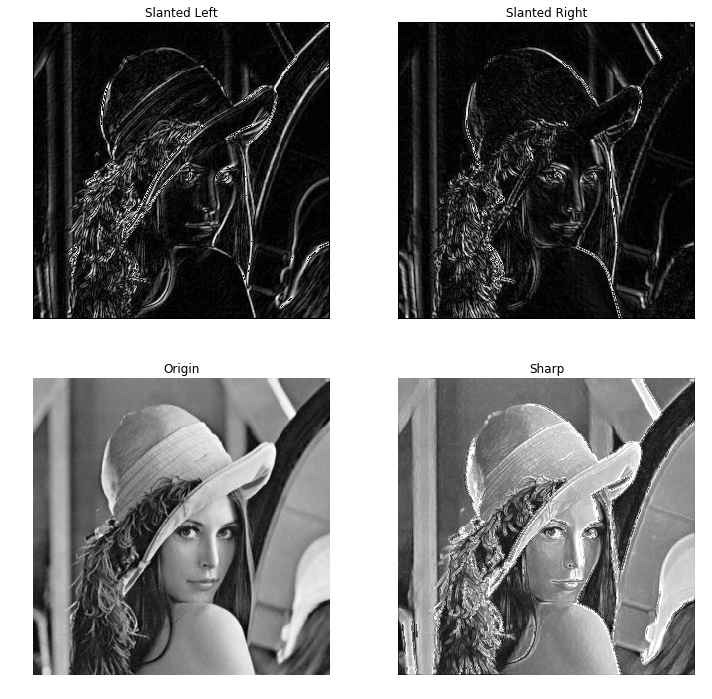

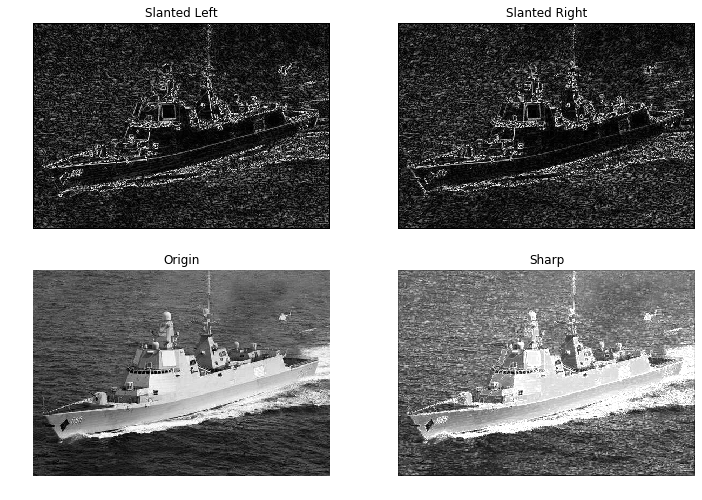

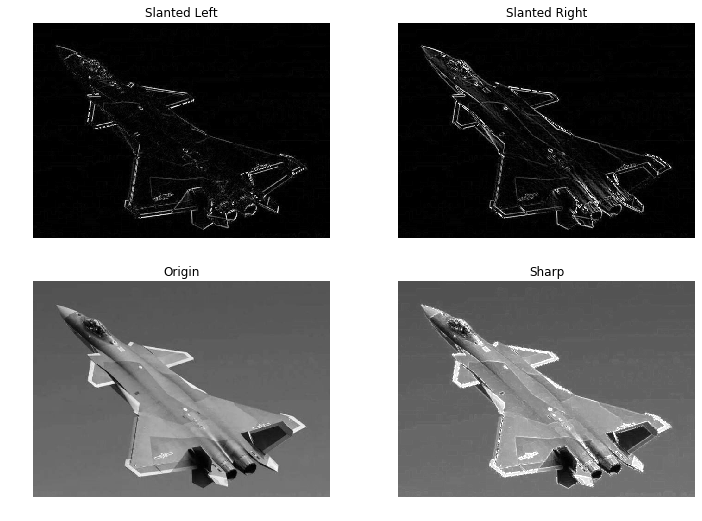

In [20]:
for i in range(1,6):
    file_path = '../Image/image'+str(i)+'.jpg'
    img = plt.imread(file_path)
    img = plt.imread(file_path)
    img_gray = np.uint8(skimage.color.rgb2gray(img)*255)
    
    slanted_l = SlantedFilter(img_gray, 'l')
    slanted_r = SlantedFilter(img_gray, 'r')
    
    img_sharp = img_gray + 0.5*(slanted_l + slanted_r)
    img_sharp[img_sharp>255] = 255
    img_sharp = np.uint8(img_sharp)

    plt.figure(figsize=(12,12*img.shape[0]/img.shape[1]))
    plt.subplot(221)
    plt.imshow(slanted_l, cmap='gray')
    plt.title('Slanted Left')
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(slanted_r, cmap='gray')
    plt.title('Slanted Right')
    plt.axis('off')
    
    plt.subplot(223)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Origin')
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(img_sharp, cmap='gray')
    plt.title('Sharp')
    plt.axis('off')

    plt.show()